
Testing with 2 features...
Accuracy: 0.9200

Testing with 5 features...
Accuracy: 0.9050

Testing with 10 features...
Accuracy: 0.9050

Testing with 20 features...
Accuracy: 0.8600

Testing with 50 features...
Accuracy: 0.7750

Testing with 100 features...
Accuracy: 0.6900


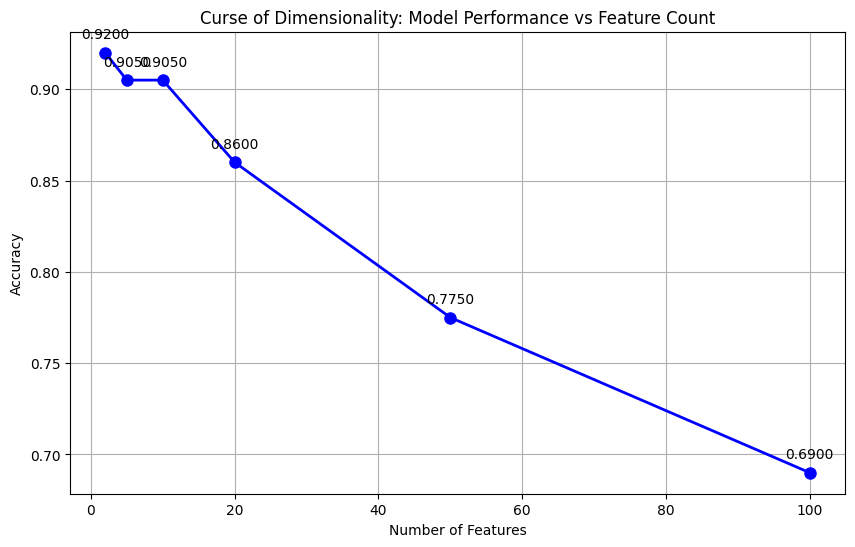

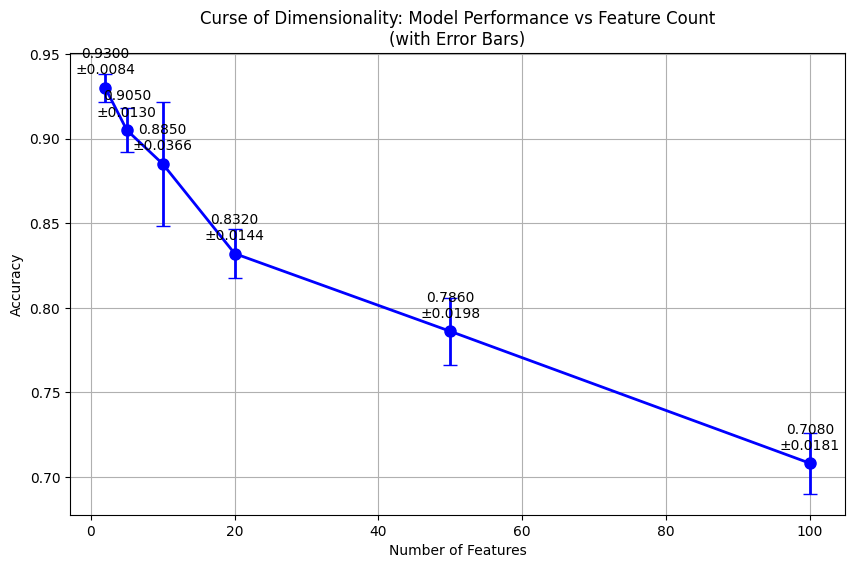


Detailed Results (Mean ± Standard Deviation):
2 features: 0.9300 ± 0.0084
5 features: 0.9050 ± 0.0130
10 features: 0.8850 ± 0.0366
20 features: 0.8320 ± 0.0144
50 features: 0.7860 ± 0.0198
100 features: 0.7080 ± 0.0181


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Function to create dataset with specified number of features
def create_dataset(n_features):
    X, y = make_classification(
        n_samples=1000,
        n_features=n_features,
        n_informative=2,  # Only 2 features are actually informative
        n_redundant=0,
        n_repeated=0,
        n_classes=2,
        n_clusters_per_class=1,
        random_state=42
    )
    return X, y

# List of different feature dimensions to test
feature_dims = [2, 5, 10, 20, 50, 100]
accuracies = []

# Test performance across different dimensions
for n_features in feature_dims:
    print(f"\nTesting with {n_features} features...")
    
    # Create dataset
    X, y = create_dataset(n_features)
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train and evaluate KNN classifier
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    
    # Make predictions
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
    print(f"Accuracy: {accuracy:.4f}")

# Create visualization
plt.figure(figsize=(10, 6))
plt.plot(feature_dims, accuracies, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Curse of Dimensionality: Model Performance vs Feature Count')
plt.grid(True)

# Add annotations
for i, acc in enumerate(accuracies):
    plt.annotate(f'{acc:.4f}', 
                (feature_dims[i], acc),
                xytext=(0, 10),
                textcoords='offset points',
                ha='center')
plt.show()

# plt.savefig('curse_of_dimensionality.png')
# plt.close()

# Create a more detailed analysis with multiple runs
n_runs = 5
all_accuracies = []

for _ in range(n_runs):
    run_accuracies = []
    for n_features in feature_dims:
        X, y = create_dataset(n_features)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)
        knn = KNeighborsClassifier(n_neighbors=5)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        run_accuracies.append(accuracy)
    all_accuracies.append(run_accuracies)

# Calculate mean and standard deviation
mean_accuracies = np.mean(all_accuracies, axis=0)
std_accuracies = np.std(all_accuracies, axis=0)

# Create error bar plot
plt.figure(figsize=(10, 6))
plt.errorbar(feature_dims, mean_accuracies, yerr=std_accuracies, 
             fmt='bo-', linewidth=2, markersize=8, capsize=5)
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Curse of Dimensionality: Model Performance vs Feature Count\n(with Error Bars)')
plt.grid(True)

# Add annotations
for i, (mean_acc, std_acc) in enumerate(zip(mean_accuracies, std_accuracies)):
    plt.annotate(f'{mean_acc:.4f}\n±{std_acc:.4f}', 
                (feature_dims[i], mean_acc),
                xytext=(0, 10),
                textcoords='offset points',
                ha='center')
plt.show()
# plt.savefig('curse_of_dimensionality_with_error_bars.png')
# plt.close()

# Print detailed results
print("\nDetailed Results (Mean ± Standard Deviation):")
for i, n_features in enumerate(feature_dims):
    print(f"{n_features} features: {mean_accuracies[i]:.4f} ± {std_accuracies[i]:.4f}")